# Несбалансированные выборки. Практическая работа

## Цель практической работы

Научиться обрабатывать несбалансированные данные и обучать модели машинного обучения на таких данных.

## Что входит в работу


1. Загрузить данные и провести разведочный анализ.
2. Разделить данные на обучающую и тестовую выборки.
3. Подготовить данные для моделирования.
4. Сбалансировать данные методом SMOTE и обучить модель машинного обучения.
5. Обучить модель машинного обучения с использованием весов классов и кросс-валидации.
6. Сравнить метрики качества четырёх моделей.




## Что оценивается 

- Выполнены все этапы работы.
- Не допущена утечка данных при разделении выборок и подготовке данных.
- Данные корректным образом сбалансированы.
- Модели не переобучены.


## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.


# Задача

Пусть у нас имеется некоторый набор данных `german_credit_data.csv` о заёмщиках банка:

* Age — возраст заёмщика.
* Sex — пол заёмщика.
* Job — тип работы заёмщика.
* Housing — тип жилья заёмщика.
* Saving accounts — объём средств на сберегательных счетах заёмщика.
* Checking account — объём средств на основном счёте заёмщика.
* Credit amount — размер кредита. 
* Duration — срок кредита (в месяцах).
* Purpose — цель кредита.
* Risk — таргет, допустил ли заёмщик просрочку платежей по кредиту.

Решите задачу классификации заёмщиков, чтобы банк умел заранее предсказывать просрочку платежей по кредиту. 



# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Чтобы не мешали предупреждающие сообщения...
import warnings
warnings.filterwarnings("ignore")


In [4]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('german_credit_data.csv')

In [5]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [8]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

### Закодируем категориальные признаки

In [11]:
# Создание словаря для кодирования
sex_encoding = {'male': 1, 'female': 2}

# Применение label encoding
data['Sex'] = data['Sex'].map(sex_encoding)

In [12]:
# Создание словаря для кодирования
housing_encoding = {'own': 1, 'rent': 2, 'free': 3}

# Применение label encoding
data['Housing_encoded'] = data['Housing'].map(housing_encoding)

In [13]:
# Создание уникальных кодов для каждой уникальной цели из столбца 'Purpose'
unique_purposes = data['Purpose'].unique()
purpose_encoding = {purpose: index + 1 for index, purpose in enumerate(unique_purposes)}

# Применение кодирования к столбцу 'Purpose'
data['Purpose_encoding'] = data['Purpose'].map(purpose_encoding)


#### Risk — таргет, допустил ли заёмщик просрочку платежей по кредиту

Если допущена просрочка = 1, нет просрочки = 0

In [14]:
# Создание словаря для кодирования
risk_encoding = {'good': 0, 'bad': 1}

# Применение label encoding
data['target'] = data['Risk'].map(risk_encoding)

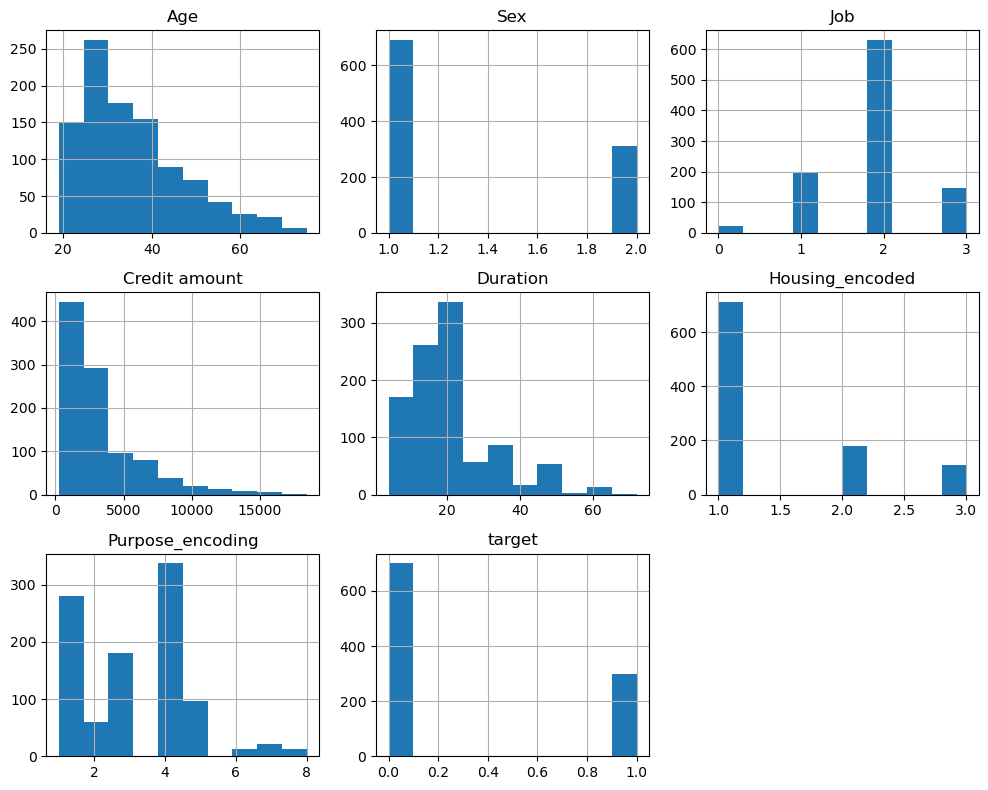

In [15]:
# Вывод гистограмм для всех числовых столбцов
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [16]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Housing_encoded,Purpose_encoding,target
0,67,1,2,own,NaN,little,1169,6,radio/TV,good,1,1,0
1,22,2,2,own,little,moderate,5951,48,radio/TV,bad,1,1,1
2,49,1,1,own,little,NaN,2096,12,education,good,1,2,0
3,45,1,2,free,little,little,7882,42,furniture/equipment,good,3,3,0
4,53,1,2,free,little,little,4870,24,car,bad,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,2,1,own,little,NaN,1736,12,furniture/equipment,good,1,3,0
996,40,1,3,own,little,little,3857,30,car,good,1,4,0
997,38,1,2,own,little,NaN,804,12,radio/TV,good,1,1,0
998,23,1,2,free,little,little,1845,45,radio/TV,bad,3,1,1


In [17]:
# Выбор числовых столбцов
numeric_columns = data.select_dtypes(include=['int', 'float'])

# Вычисление матрицы корреляции
correlation_matrix = numeric_columns.corr()

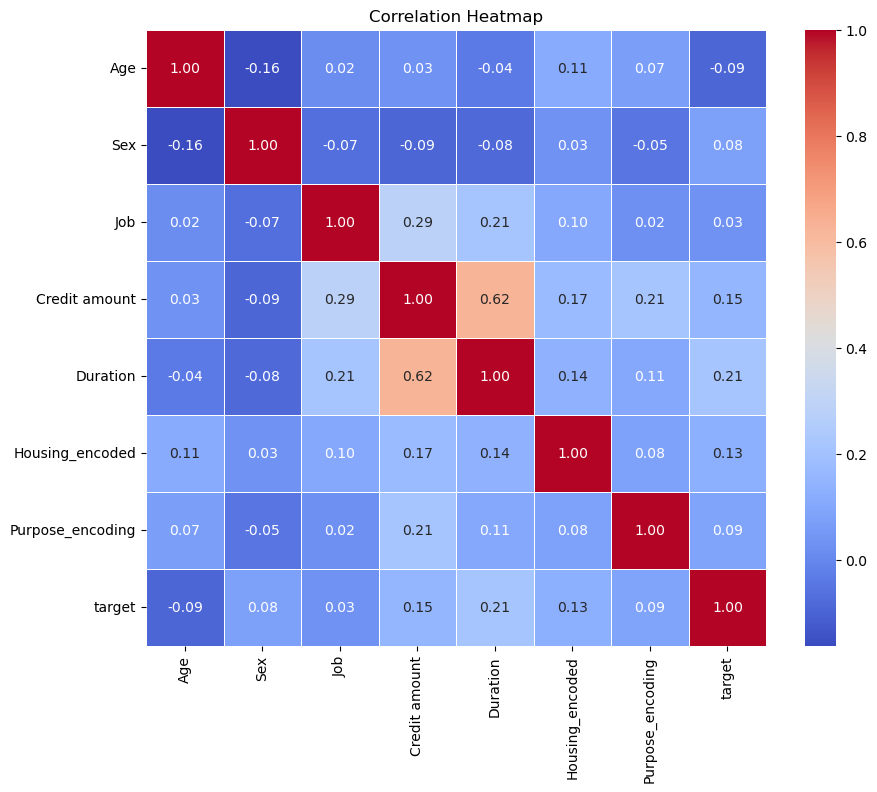

In [18]:
# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
correlation_matrix

,Age,Sex,Job,Credit amount,Duration,Housing_encoded,Purpose_encoding,target
Age,1.000000,-0.161694,0.015673,0.032716,-0.036136,0.112051,0.071069,-0.091127
Sex,-0.161694,1.000000,-0.070298,-0.093482,-0.081432,0.033818,-0.051436,0.075493
Job,0.015673,-0.070298,1.000000,0.285385,0.210910,0.101939,0.024629,0.032735
Credit amount,0.032716,-0.093482,0.285385,1.000000,0.624984,0.171585,0.214513,0.154739
Duration,-0.036136,-0.081432,0.210910,0.624984,1.000000,0.137434,0.105524,0.214927
Housing_encoded,0.112051,0.033818,0.101939,0.171585,0.137434,1.000000,0.081054,0.127789
Purpose_encoding,0.071069,-0.051436,0.024629,0.214513,0.105524,0.081054,1.000000,0.090001
target,-0.091127,0.075493,0.032735,0.154739,0.214927,0.127789,0.090001,1.000000


### Заполним пропуски в 'Saving accounts', 'Checking account'

Используем модель машинного обучения для предсказания пропущенных значений на основе других признаков в датасете. 

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
# Разделение данных на train set и test set
train_data = data.dropna(subset=['Saving accounts', 'Checking account'])
test_data = data[data['Saving accounts'].isnull() | data['Checking account'].isnull()]


In [22]:
train_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Housing_encoded,Purpose_encoding,target
1,22,2,2,own,little,moderate,5951,48,radio/TV,bad,1,1,1
3,45,1,2,free,little,little,7882,42,furniture/equipment,good,3,3,0
4,53,1,2,free,little,little,4870,24,car,bad,3,4,1
7,35,1,3,rent,little,moderate,6948,36,car,good,2,4,0
9,28,1,3,own,little,moderate,5234,30,car,bad,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,1,1,own,little,moderate,1743,24,radio/TV,good,1,1,0
993,30,1,3,own,little,little,3959,36,furniture/equipment,good,1,3,0
996,40,1,3,own,little,little,3857,30,car,good,1,4,0
998,23,1,2,free,little,little,1845,45,radio/TV,bad,3,1,1


In [23]:
# Выбор признаков и целевой переменной для обучения модели
features = ['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'Housing_encoded', 'Purpose_encoding']
X_train = train_data[features]
y_train_saving = train_data['Saving accounts']
y_train_checking = train_data['Checking account']

In [24]:
# Обучение модели для Saving accounts
model_saving = RandomForestClassifier()
model_saving.fit(X_train, y_train_saving)

# Обучение модели для Checking account
model_checking = RandomForestClassifier()
model_checking.fit(X_train, y_train_checking)

RandomForestClassifier()

In [25]:
# Предсказание пропущенных значений в Saving accounts
X_test_saving = test_data[features]
predicted_saving = model_saving.predict(X_test_saving)

In [26]:
# Предсказание пропущенных значений в Checking account
X_test_checking = test_data[features]
predicted_checking = model_checking.predict(X_test_checking)

In [27]:
# Замена пропущенных значений предсказанными значениями
data.loc[test_data.index, 'Saving accounts'] = predicted_saving
data.loc[test_data.index, 'Checking account'] = predicted_checking

In [28]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
Housing_encoded     0
Purpose_encoding    0
target              0
dtype: int64

In [29]:
data['Checking account'].value_counts()

little      519
moderate    420
rich         61
Name: Checking account, dtype: int64

In [30]:
# Создание словаря для кодирования
saving_encoding = {'little': 1, 'moderate': 2, 'rich': 3, 'quite rich': 4}

# Применение label encoding
data['saving_encoding'] = data['Saving accounts'].map(saving_encoding)

In [31]:
# Создание словаря для кодирования
cheking_encoding = {'little': 1, 'moderate': 2, 'rich': 3}

# Применение label encoding
data['cheking_encoding'] = data['Checking account'].map(cheking_encoding)

In [32]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Housing_encoded,Purpose_encoding,target,saving_encoding,cheking_encoding
0,67,1,2,own,little,moderate,1169,6,radio/TV,good,1,1,0,1,2
1,22,2,2,own,little,moderate,5951,48,radio/TV,bad,1,1,1,1,2
2,49,1,1,own,little,moderate,2096,12,education,good,1,2,0,1,2
3,45,1,2,free,little,little,7882,42,furniture/equipment,good,3,3,0,1,1
4,53,1,2,free,little,little,4870,24,car,bad,3,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,2,1,own,little,little,1736,12,furniture/equipment,good,1,3,0,1,1
996,40,1,3,own,little,little,3857,30,car,good,1,4,0,1,1
997,38,1,2,own,little,moderate,804,12,radio/TV,good,1,1,0,1,2
998,23,1,2,free,little,little,1845,45,radio/TV,bad,3,1,1,1,1


In [33]:
# Выбор числовых столбцов
numeric_columns = data.select_dtypes(include=['int', 'float'])

# Вычисление матрицы корреляции
correlation_matrix = numeric_columns.corr()

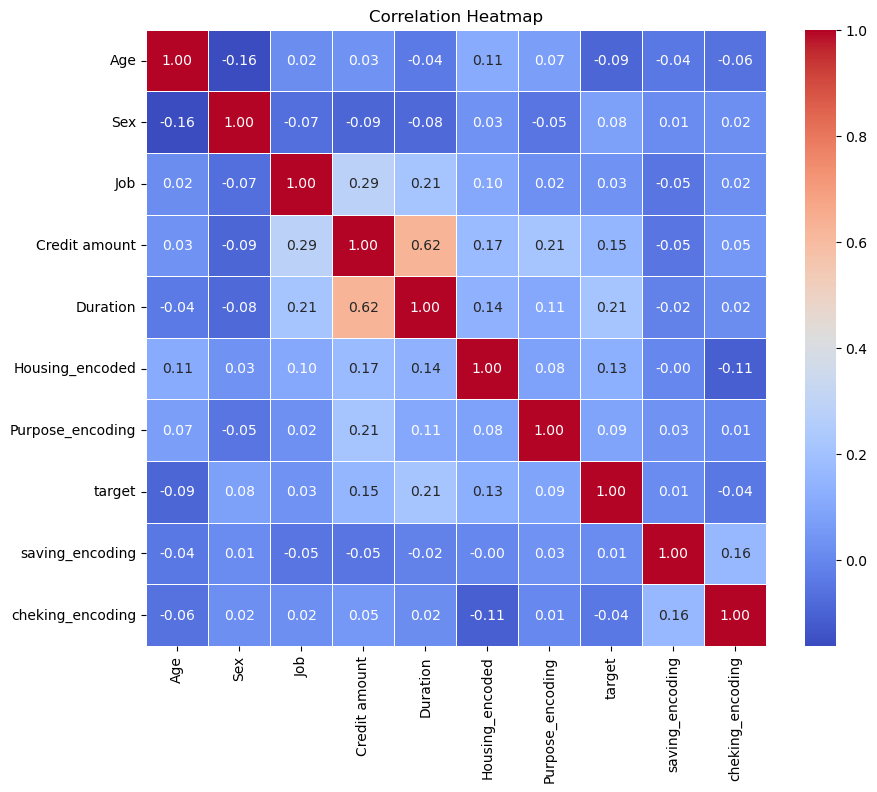

In [34]:
# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
df = numeric_columns.copy()

In [36]:
from sklearn.preprocessing import StandardScaler

# Создание объекта StandardScaler
scaler = StandardScaler()

# Выбор числовых признаков для масштабирования
numeric_features = ['Age', 'Credit amount', 'Duration']

# Применение стандартизации к числовым признакам
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [37]:
df

,Age,Sex,Job,Credit amount,Duration,Housing_encoded,Purpose_encoding,target,saving_encoding,cheking_encoding
0,2.766456,1,2,-0.745131,-1.236478,1,1,0,1,2
1,-1.191404,2,2,0.949817,2.248194,1,1,1,1,2
2,1.183312,1,1,-0.416562,-0.738668,1,2,0,1,2
3,0.831502,1,2,1.634247,1.750384,3,3,0,1,1
4,1.535122,1,2,0.566664,0.256953,3,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,2,1,-0.544162,-0.738668,1,3,0,1,1
996,0.391740,1,3,0.207612,0.754763,1,4,0,1,1
997,0.215835,1,2,-0.874503,-0.738668,1,1,0,1,2
998,-1.103451,1,2,-0.505528,1.999289,3,1,1,1,1


### Выводы после обработки и анализа данных 

    Исходя из представленной матрицы корреляции, можно сделать следующие выводы:

1. Возраст (Age):
   * Корреляция между возрастом и другими признаками слабая. Наибольшая корреляция наблюдается с суммой кредита (0.032716), что может указывать на незначительное влияние возраста на решение о выдаче кредита.
   
   
2. Профессия (Job):
   * Профессия также имеет слабую корреляцию с другими признаками. Наибольшая корреляция (0.285385) наблюдается с суммой кредита, что может указывать на некоторое влияние профессии на размер запрашиваемого кредита. 
   * Также существует умеренная положительная корреляция между профессией и длительностью кредита (коэффициент корреляции 0.21), что может свидетельствовать о том, что определенные категории работников чаще выбирают кредиты на длительный срок. *


3. Сумма кредита (Credit amount):
   * Существует умеренная корреляция между суммой кредита и длительностью кредита (0.624984). Это означает, что сумма кредита часто увеличивается с увеличением срока кредита.
   * Корреляция между суммой кредита и возрастом также слабая (0.032716), что указывает на то, что возраст не сильно влияет на запрашиваемую сумму кредита. 
   * Существует умеренная положительная корреляция между суммой кредита и длительностью кредита (коэффициент корреляции 0.62). Это означает, что чем больше сумма кредита, тем вероятнее, что он будет взят на более длительный срок. 
   * Также есть слабая положительная корреляция между суммой кредита и профессией (коэффициент корреляции 0.29), что может указывать на то, что определенные категории работников чаще запрашивают кредиты большего размера.

4. Длительность кредита (Duration):
   * Как уже упоминалось, существует умеренная корреляция между длительностью кредита и суммой кредита (0.624984). Это означает, что с увеличением запрашиваемой суммы часто увеличивается и срок кредита.
   * Корреляция между длительностью кредита и возрастом слабая (-0.036136), что может указывать на отсутствие существенного влияния возраста на срок кредита.
   * Коэффициент корреляции между длительностью кредита и профессией составляет 0.21, что указывает на умеренную положительную корреляцию. Это может означать, что определенные категории работников предпочитают брать кредиты на более длительный срок.
   * Также существует слабая отрицательная корреляция между длительностью кредита и возрастом (-0.04). Это может указывать на то, что более молодые клиенты склонны брать кредиты на более короткий срок, в то время как более старшие клиенты предпочитают кредиты с более длительным сроком.

# Задание 2

Разделите датасет на обучающую и тестовую выборки в пропорции 80:20. Разделение должно быть стратифицированным по таргету Risk.

В этом и следующих заданиях используйте random_state = 1.

In [137]:
from sklearn.model_selection import train_test_split

# Определение признаков (X) и целевой переменной (y)
X = df.drop(columns=['target'])
y = df['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Проверка размеров полученных выборок
print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])


Размер обучающей выборки: 800
Размер тестовой выборки: 200


# Задание 3

Проведите этап очистки и подготовки данных (data preparation) и подготовьте данные к моделированию.

In [39]:
# сделано ранее

# Задание 4

Сбалансируйте обучающую выборку методом SMOTE и обучите модель RandomForestClassifier. Подберите оптимальные гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

### Решение проблемы "How to resolve "cannot import name '_MissingValues' from 'sklearn.utils._param_validation'" issue when trying to import imblearn?"

For those who came across this issue on Jupyter notebook, here's [how I solved it](https://stackoverflow.com/questions/76593906/how-to-resolve-cannot-import-name-missingvalues-from-sklearn-utils-param-v/77483403#77483403)

1. !pip uninstall scikit-learn --yes
2. !pip uninstall imblearn --yes
3. !pip install scikit-learn==1.2.2
4. !pip install imblearn
5. Restart anaconda navigator It should work

In [127]:
from imblearn.over_sampling import SMOTE
RANDOM_SEED = 1
os = SMOTE(random_state=RANDOM_SEED, k_neighbors=2)

features = ['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'Housing_encoded', 'Purpose_encoding', 'saving_encoding', 'cheking_encoding']
target = 'target'

X_train, y_train = os.fit_resample(X_train, y_train)

In [129]:
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=RANDOM_SEED)
model.fit(X_train, y_train)

#X_test, y_test = df[features], df[target]
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.6432403433476395


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Определяем сетку параметров
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Создаем экземпляр модели RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Создаем экземпляр GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc')

# Выполняем поиск по сетке параметров
grid_search.fit(X_train, y_train)

# Получаем наилучшие параметры
best_params = grid_search.best_params_
print("Наилучшие параметры:", best_params)

# Получаем оценку модели
best_score = grid_search.best_score_
print("Наилучшая оценка:", best_score)


Наилучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Наилучшая оценка: 0.8078603316326533


In [75]:
from sklearn.metrics import roc_auc_score

# Получаем наилучшую модель из GridSearchCV
best_model = grid_search.best_estimator_

# Предсказываем вероятности классов на тестовой выборке
y_pred_proba = best_model.predict_proba(X_test)

# Вычисляем ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print("ROC-AUC на тестовой выборке:", roc_auc)


ROC-AUC на тестовой выборке: 0.9545666666666667


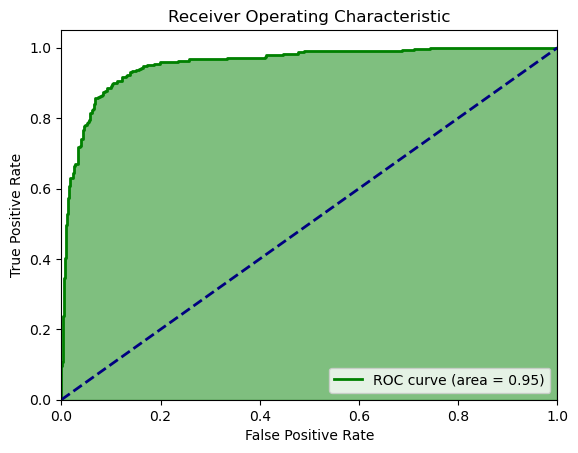

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Вычисляем значения ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Вычисляем площадь под ROC-кривой
roc_auc = auc(fpr, tpr)

# Строим ROC-кривую и закрашиваем площадь под ней
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='green', alpha=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Инициализация модели
rf_classifier = RandomForestClassifier(random_state=1)

# Выполнение кросс-валидации
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Вывод результатов кросс-валидации
print("Средняя точность на кросс-валидации:", cv_scores.mean())
print("Стандартное отклонение точности на кросс-валидации:", cv_scores.std())


Средняя точность на кросс-валидации: 0.7383928571428571
Стандартное отклонение точности на кросс-валидации: 0.041553843850786074


Средняя точность на кросс-валидации составляет примерно 0.738, с стандартным отклонением около 0.042. Это означает, что средняя точность модели на различных фолдах кросс-валидации составляет около 73.8%, с отклонением в пределах 4.2%.

# Задание 5

Обучите модель RandomForestClassifier с использованием весов классов. Подберите оптимальные веса и гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Инициализация и обучение модели RandomForestClassifier с использованием весов классов
rf_classifier_weighted = RandomForestClassifier(class_weight='balanced', random_state=1)
rf_classifier_weighted.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred_weighted = rf_classifier_weighted.predict(X_test)

# Оценка производительности модели
print("Отчет о классификации RandomForestClassifier с использованием весов классов:")
print(classification_report(y_test, y_pred_weighted))


Отчет о классификации RandomForestClassifier с использованием весов классов:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       700
           1       0.87      0.90      0.88       300

    accuracy                           0.93      1000
   macro avg       0.91      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000



Отчет о классификации RandomForestClassifier с использованием весов классов показывает следующее:

* Для класса 0 (негативный класс) precision составляет 96%, recall - 94%, а f1-score - 95%. Это означает, что из всех предсказанных моделью отрицательных случаев 96% действительно являются отрицательными, и модель обнаруживает 94% всех реальных отрицательных случаев. F1-score представляет собой гармоническое среднее precision и recall, что учитывает оба значения.

* Для класса 1 (положительный класс) precision составляет 87%, recall - 90%, а f1-score - 88%. Это означает, что из всех предсказанных моделью положительных случаев 87% действительно являются положительными, и модель обнаруживает 90% всех реальных положительных случаев.

* Accuracy модели составляет 93%, что означает, что 93% всех предсказаний модели верны.

Общий вывод: Модель RandomForestClassifier с использованием весов классов хорошо справляется с обеими классами, обеспечивая высокие показатели precision, recall и f1-score. Это говорит о том, что модель хорошо обобщает данные и может эффективно разделять классы.

In [80]:
from sklearn.model_selection import GridSearchCV

# Задание сетки параметров для подбора
param_grid = {
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}],  # разные варианты весов классов
    'n_estimators': [50, 100, 200],  # количество деревьев в лесу
    'max_depth': [None, 5, 10, 20],  # максимальная глубина деревьев
    'min_samples_split': [2, 5, 10],  # минимальное количество выборок для разделения узла
    'min_samples_leaf': [1, 2, 4]  # минимальное количество выборок в листе
}

# Инициализация модели RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=1)

# Инициализация объекта GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Поиск оптимальных параметров
grid_search.fit(X_train, y_train)

# Вывод наилучших параметров
print("Наилучшие параметры:", grid_search.best_params_)

# Оценка производительности на тестовой выборке с использованием наилучших параметров
best_rf_classifier = grid_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test)
print("Отчет о классификации RandomForestClassifier с оптимальными параметрами:")
print(classification_report(y_test, y_pred_best))


Наилучшие параметры: {'class_weight': {0: 1, 1: 3}, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Отчет о классификации RandomForestClassifier с оптимальными параметрами:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       700
           1       0.78      0.93      0.85       300

    accuracy                           0.90      1000
   macro avg       0.87      0.91      0.89      1000
weighted avg       0.91      0.90      0.90      1000



In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Инициализация и обучение модели с наилучшими параметрами
best_rf_classifier = RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=1)
best_rf_classifier.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred_best = best_rf_classifier.predict(X_test)

# Оценка производительности модели
print("Отчет о классификации RandomForestClassifier с наилучшими параметрами:")
print(classification_report(y_test, y_pred_best))


Отчет о классификации RandomForestClassifier с наилучшими параметрами:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       700
           1       0.78      0.93      0.85       300

    accuracy                           0.90      1000
   macro avg       0.87      0.91      0.89      1000
weighted avg       0.91      0.90      0.90      1000



In [123]:
from sklearn.metrics import roc_auc_score

# Предсказание вероятностей классов на тестовой выборке
y_prob_best = best_rf_classifier.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_best)
print("ROC-AUC на тестовой выборке:", roc_auc)


ROC-AUC на тестовой выборке: 0.9735193133047211


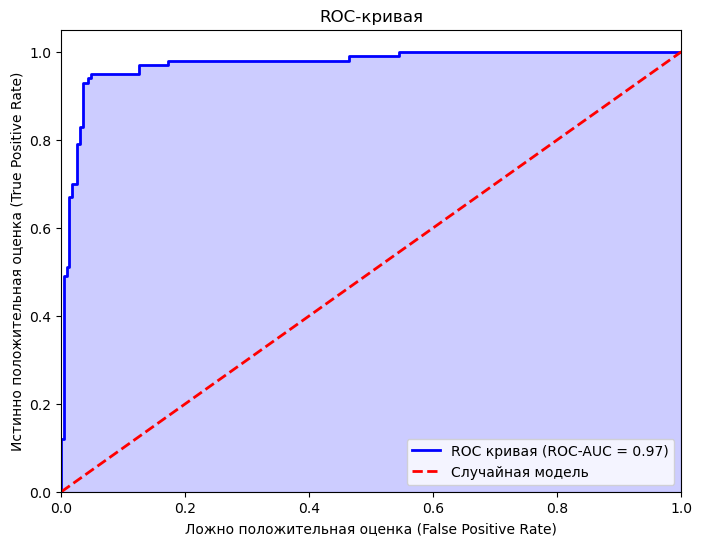

In [124]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Вычисление значений false positive rate (FPR) и true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC кривая (ROC-AUC = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='blue', alpha=0.2)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Случайная модель')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительная оценка (False Positive Rate)')
plt.ylabel('Истинно положительная оценка (True Positive Rate)')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()


In [95]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Инициализация модели
best_rf_classifier = RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=1)

# Оценка модели с помощью кросс-валидации
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=cv, scoring='accuracy')

# Вывод результатов кросс-валидации
print("Средняя точность на кросс-валидации:", scores.mean())
print("Стандартное отклонение точности на кросс-валидации:", scores.std())


Средняя точность на кросс-валидации: 0.71875
Стандартное отклонение точности на кросс-валидации: 0.007985957062499221


Средняя точность на кросс-валидации составляет примерно 0.719, а стандартное отклонение около 0.008. Это означает, что средняя точность вашей модели на различных фолдах кросс-валидации составляет около 71.9%, с отклонением в пределах 0.8%.

Такой результат говорит о том, что модель имеет неплохую стабильность на разных фолдах, что важно для уверенности в ее обобщающей способности.

### Upsampling

In [96]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1

df_train, df_test = train_test_split(df, stratify=df['target'], test_size=0.2, random_state=RANDOM_SEED)

In [97]:
from sklearn.utils import resample

df_min = df_train[df_train['target'] == 1]
df_maj = df_train[df_train['target'] == 0]

df_min_upsample = resample(df_min, replace=True, n_samples=len(df_maj), random_state=RANDOM_SEED)

print(df_min_upsample.shape)
print(df_maj.shape)


(560, 10)
(560, 10)


In [98]:
df_1 = pd.concat([df_min_upsample, df_maj], ignore_index=True).sample(frac=1.)
df_1

,Age,Sex,Job,Credit amount,Duration,Housing_encoded,Purpose_encoding,target,saving_encoding,cheking_encoding
262,1.711027,2,0,-0.737688,-0.240857,3,7,1,1,1
370,1.007407,1,3,-0.730954,-1.236478,1,4,1,1,2
113,0.391740,1,1,-0.575707,0.008048,1,4,1,1,1
673,3.382124,1,3,0.444735,0.256953,1,5,0,1,1
367,0.303788,1,3,1.129520,-0.240857,1,4,1,1,2
...,...,...,...,...,...,...,...,...,...,...
651,3.470076,2,3,-0.672471,-1.236478,1,4,0,1,2
570,0.303788,2,2,-0.854654,-1.236478,1,4,0,1,1
1106,-0.135974,1,3,-0.128046,0.256953,3,4,0,1,1
53,-0.223927,1,1,-0.314483,1.252574,2,7,1,1,2


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

features = ['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'Housing_encoded', 'Purpose_encoding', 'saving_encoding', 'cheking_encoding']
target = 'target'

X_train, y_train = df_1[features], df_1[target]
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=RANDOM_SEED)
model.fit(X_train, y_train)

X_test, y_test = df_test[features], df_test[target]
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.6486309523809525


### Downsampling

In [100]:
df_maj_downsample = resample(df_maj, replace=False, n_samples=len(df_min), random_state=RANDOM_SEED)

print(df_maj_downsample.shape)
print(df_min.shape)

(240, 10)
(240, 10)


In [101]:
df_2 = pd.concat([df_maj_downsample, df_min], ignore_index=True).sample(frac=1.)

X_train, y_train = df_2[features], df_2[target]
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=RANDOM_SEED)
model.fit(X_train, y_train)

X_test, y_test = df_test[features], df_test[target]
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.6472023809523809


### Скользящий контроль

In [122]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_SEED)

models = []
metrics = []

features = ['Age', 'Sex', 'Job', 'Credit amount', 'Duration', 'Housing_encoded', 'Purpose_encoding', 'saving_encoding', 'cheking_encoding']
target = 'target'
X, y = df[features], df[target]

for train_index, test_index in kf.split(X, y):
  X_train, y_train = X.values[train_index], y.values[train_index]
  X_test, y_test = X.values[test_index], y.values[test_index]

  model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=RANDOM_SEED, class_weight='balanced')

  model.fit(X_train, y_train)
  score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
  print(score)

  models.append(model)
  metrics.append(score)

0.6266452991452992
0.625450643776824
0.6624248927038627


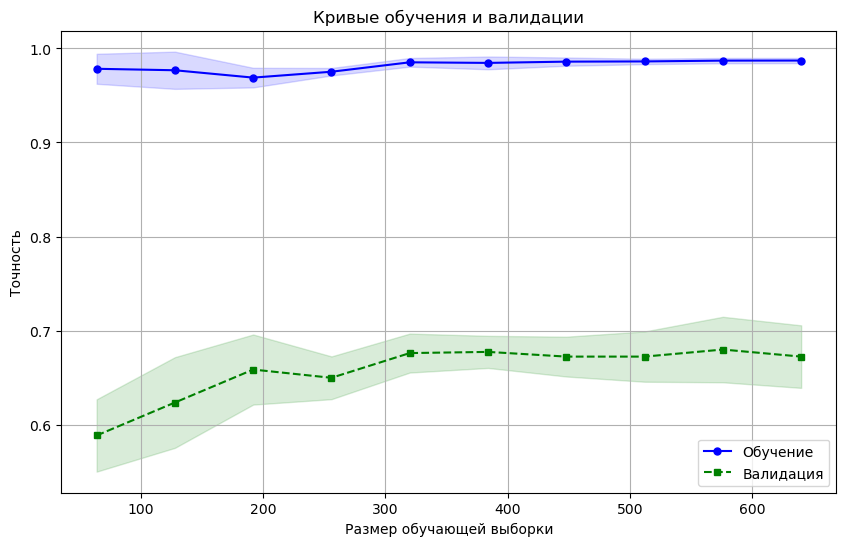

In [121]:
from sklearn.model_selection import learning_curve

# Определение размеров обучающей выборки
train_sizes, train_scores, valid_scores = learning_curve(best_rf_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='accuracy')

# Вычисление средних значений и стандартных отклонений точности
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Построение кривых обучения и валидации
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, color='green', linestyle='--', marker='s', markersize=5, label='Валидация')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Точность')
plt.title('Кривые обучения и валидации')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Этот результат говорит о том, что модель демонстрирует высокую точность на обучающем наборе данных (около 97-99%), что может свидетельствовать о том, что она способна "запоминать" обучающие данные и адаптироваться к ним. Однако, кривая валидации показывает, что точность на валидационном наборе данных начинает увеличиваться не так быстро и остается на более низком уровне (от 50% до 75%). Это может указывать на то, что модель имеет тенденцию к переобучению, то есть она может плохо обобщать знания на новые данные, не участвующие в обучении.

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Обучение модели
best_rf_classifier.fit(X_train, y_train)

# Получение предсказаний на тестовой выборке
y_pred = best_rf_classifier.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print("Точность (Accuracy) на тестовой выборке:", accuracy)
print("Precision на тестовой выборке:", precision)
print("Recall на тестовой выборке:", recall)
print("F1-score на тестовой выборке:", f1)


Точность (Accuracy) на тестовой выборке: 0.68
Precision на тестовой выборке: 0.4666666666666667
Recall на тестовой выборке: 0.4666666666666667
F1-score на тестовой выборке: 0.4666666666666667


In [120]:
X_test.shape

(200, 9)

In [231]:
# Инициализация и обучение модели на обучающем наборе данных
model = RandomForestClassifier(n_estimators=4, max_depth=3, random_state=1)
model.fit(X_train, y_train)

# Получение предсказаний вероятностей для тестового набора данных
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC на тестовом наборе данных
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Вывод значения ROC-AUC
print("ROC-AUC на тестовом наборе данных:", roc_auc)

ROC-AUC на тестовом наборе данных: 0.716547619047619


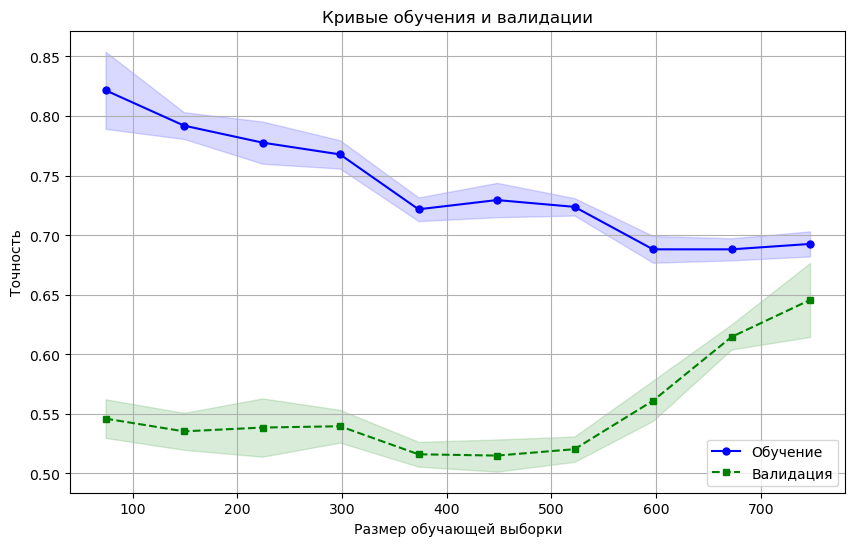

In [130]:
from sklearn.model_selection import learning_curve

# Определение размеров обучающей выборки
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=cv, scoring='accuracy')

# Вычисление средних значений и стандартных отклонений точности
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Построение кривых обучения и валидации
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Обучение')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, color='green', linestyle='--', marker='s', markersize=5, label='Валидация')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Точность')
plt.title('Кривые обучения и валидации')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [131]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Получение предсказаний на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Вывод результатов
print("Точность (Accuracy) на тестовой выборке:", accuracy)
print("Precision на тестовой выборке:", precision)
print("Recall на тестовой выборке:", recall)
print("F1-score на тестовой выборке:", f1)


Точность (Accuracy) на тестовой выборке: 0.6666666666666666
Precision на тестовой выборке: 0.44554455445544555
Recall на тестовой выборке: 0.45
F1-score на тестовой выборке: 0.44776119402985076


In [134]:
from sklearn.metrics import roc_auc_score

# Предсказание вероятностей классов на тестовой выборке
y_prob_best = best_rf_classifier.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_best)
print("ROC-AUC на тестовой выборке:", roc_auc)


ROC-AUC на тестовой выборке: 0.9735193133047211


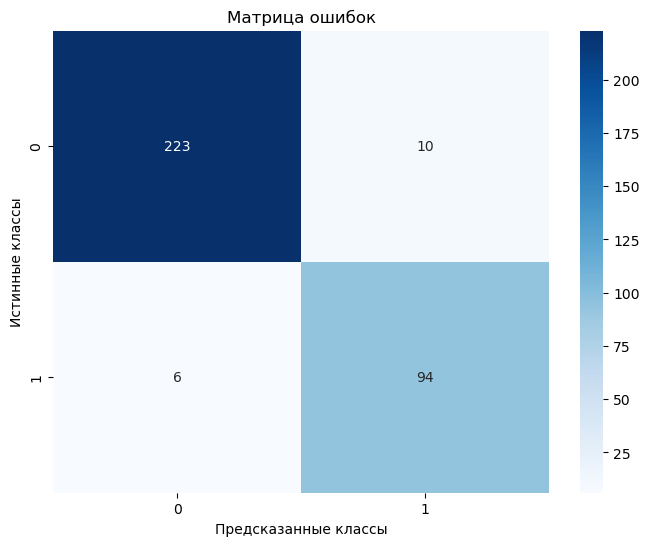

In [135]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получение прогнозов модели
y_pred = best_rf_classifier.predict(X_test)

# Создание матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()


### Выводы

После проведенных исследований, наилучшее предсказание показывает модель 

best_rf_classifier = RandomForestClassifier

с параметрами (class_weight={0: 1, 1: 3}, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=1)

1. Модель совершила небольшое количество ошибок при классификации отрицательных примеров (TN = 223), что говорит о ее способности правильно идентифицировать отрицательные случаи.
2. Однако она также совершила небольшое количество ложноположительных ошибок (FP = 10), что означает, что некоторые негативные примеры были неверно классифицированы как положительные. Возможно, это может быть улучшено путем дополнительной настройки модели или увеличения обучающей выборки.
3. Модель правильно классифицировала большинство положительных примеров (TP = 94), но также допустила несколько ложноотрицательных ошибок (FN = 6), что указывает на то, что некоторые истинные положительные случаи были неверно классифицированы как отрицательные. Возможно, улучшение модели в этой области также может быть достигнуто путем изменения порогового значения вероятности или использования других методов машинного обучения.

Отвечает ли модель на вопрос "Допустит ли заёмщик просрочку платежей по кредиту в будущем?". 

* Истинно положительные (True Positives, TP): В данном случае это количество заёмщиков, которых модель правильно классифицировала как тех, кто действительно допустит просрочку платежей по кредиту. Это важный показатель, поскольку он указывает на способность модели выявлять рискованных заемщиков. В данном случае, это 94 человека.

* Ложноотрицательные (False Negatives, FN): Это количество заёмщиков, которых модель неверно классифицировала как тех, кто не допустит просрочку платежей, но на самом деле они ее допустили. Это очень важные случаи, поскольку банк может потерять деньги из-за просрочек, которые не были правильно идентифицированы моделью. В данном случае их всего 6 человек.

Исходя из этой матрицы ошибок, можно сделать вывод о том, что модель имеет некоторые ограниченные способности в предсказании будущих просрочек платежей по кредиту. Однако, существует некоторый риск, что модель может не улавливать все случаи просрочек, что может привести к финансовым потерям для банка. Таким образом, для улучшения модели требуется дальнейший анализ и улучшение методов прогнозирования просрочек платежей.

In [138]:
from sklearn.metrics import roc_auc_score

# Предсказание вероятностей классов на тестовой выборке
y_prob_best = best_rf_classifier.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_best)
print("ROC-AUC на тестовой выборке:", roc_auc)


ROC-AUC на тестовой выборке: 0.6772619047619047
